In [2]:
import os
import tarfile
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ETL

In [3]:

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url, housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


def load_housing_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
fetch_housing_data(HOUSING_URL,HOUSING_PATH)

# Descritiva

In [ ]:
housing = load_housing_data(HOUSING_PATH)
housing_2 = housing.drop(columns="ocean_proximity")

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<Axes: >

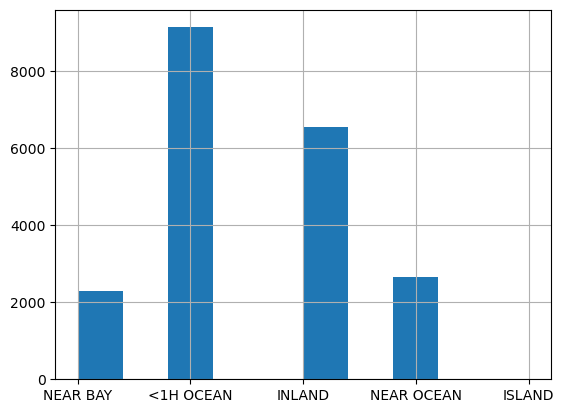

In [7]:
housing["ocean_proximity"].hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

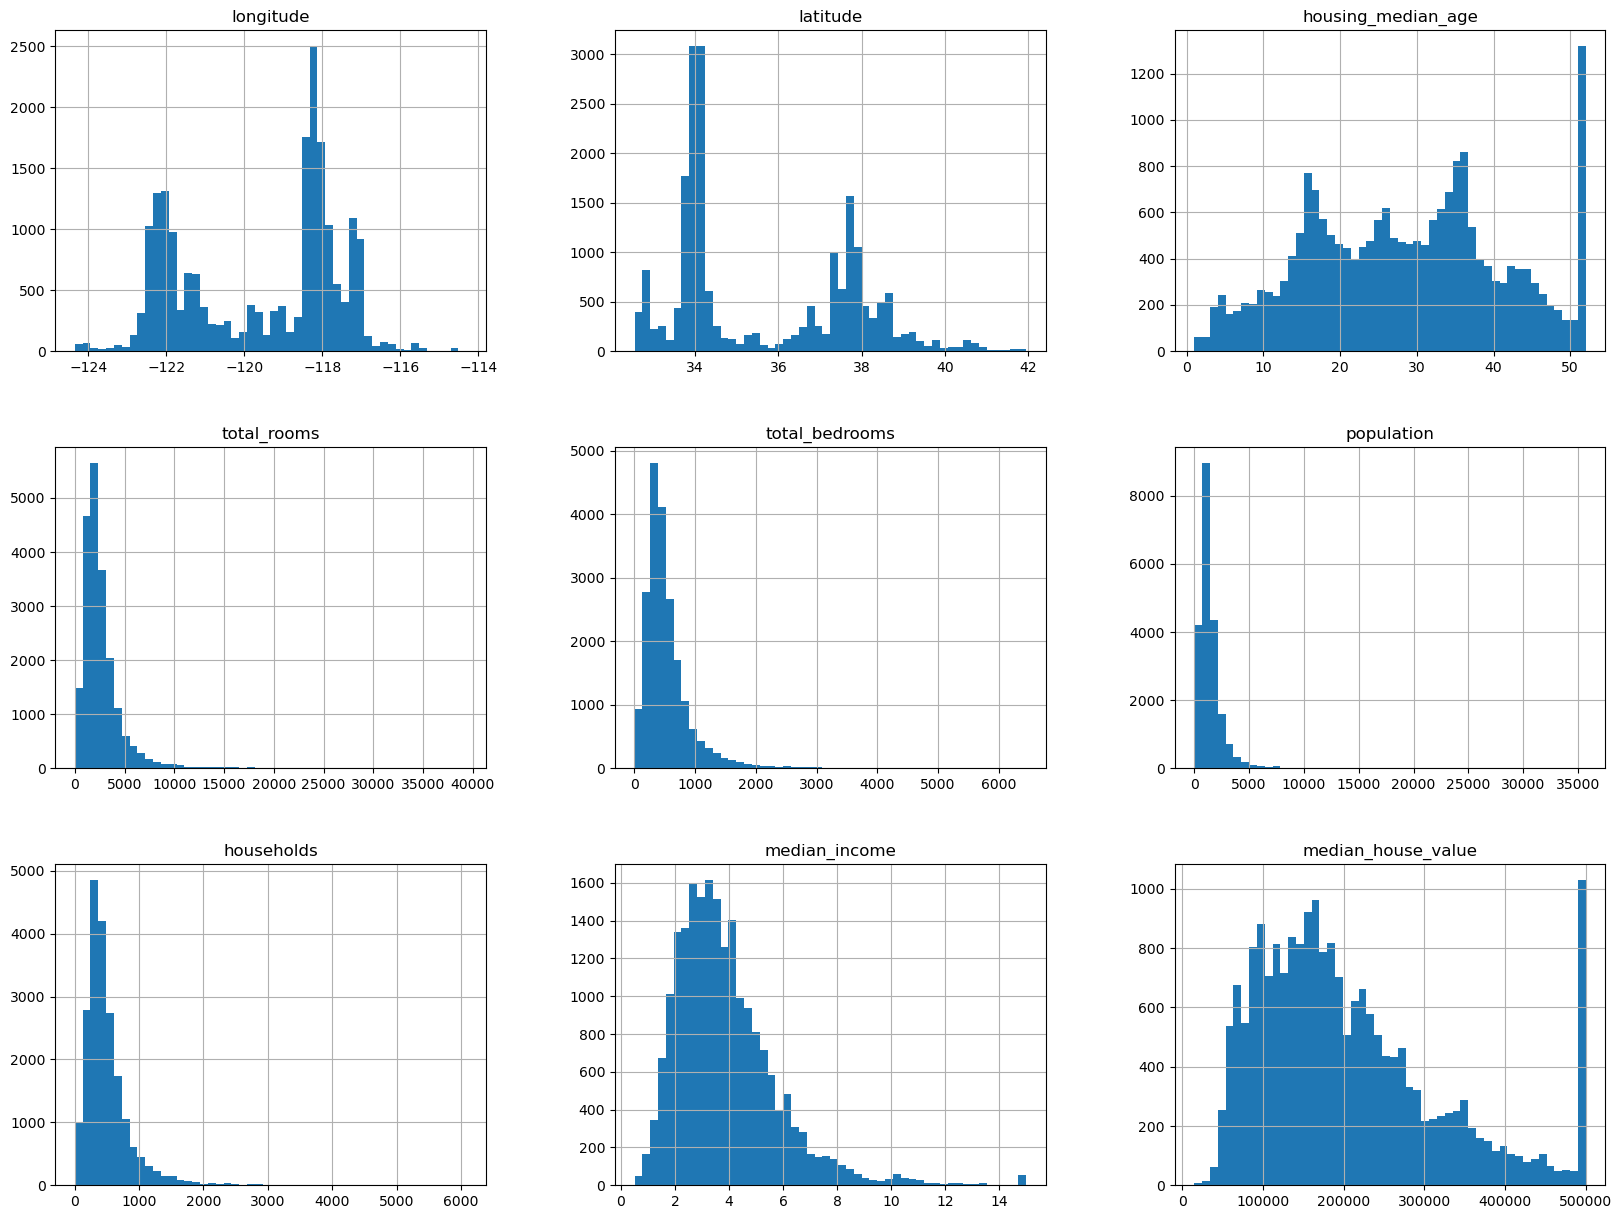

In [8]:
housing.hist(bins=50, figsize=(20,15))

In [53]:
#criando novas variáveis
housing_3 = housing_2.copy()

colunas_casa = ["total_rooms","households","total_bedrooms"]

for columns in colunas_casa:
    for columns_2 in colunas_casa:
        if columns == columns_2 or columns == "median_house_value" or columns_2 == "median_house_value":
            pass
        else: 
            nome_coluna = columns+" DIV "+columns_2
            #print(nome_coluna)
            #print(housing_2[columns]/housing_2[columns_2])
            housing_3[nome_coluna] = housing_2[columns]/housing_2[columns_2]


housing_3.head()
    


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms DIV households,total_rooms DIV total_bedrooms,households DIV total_rooms,households DIV total_bedrooms,total_bedrooms DIV total_rooms,total_bedrooms DIV households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,6.821705,0.143182,0.976744,0.146591,1.023810
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,6.418626,0.160304,1.028933,0.155797,0.971880
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,7.721053,0.120654,0.931579,0.129516,1.073446
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,5.421277,0.171900,0.931915,0.184458,1.073059
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,5.810714,0.159189,0.925000,0.172096,1.081081


median_house_value                1.000000
median_income                     0.688075
total_rooms DIV total_bedrooms    0.383920
total_rooms DIV households        0.151948
total_rooms                       0.134153
housing_median_age                0.105623
households DIV total_bedrooms     0.091680
households                        0.065843
total_bedrooms                    0.049686
population                       -0.024650
longitude                        -0.045967
total_bedrooms DIV households    -0.046739
latitude                         -0.144160
households DIV total_rooms       -0.214654
total_bedrooms DIV total_rooms   -0.255880
Name: median_house_value, dtype: float64
Index(['median_house_value', 'median_income',
       'total_rooms DIV total_bedrooms'],
      dtype='object')


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms DIV total_bedrooms', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms DIV total_bedrooms', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms DIV total_bedrooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms DIV total_bedrooms'>,
        <Axes: xlabel='total_rooms DIV total_bedrooms', ylabel='total_rooms DIV total_bedrooms'>]],
      dtype=object)

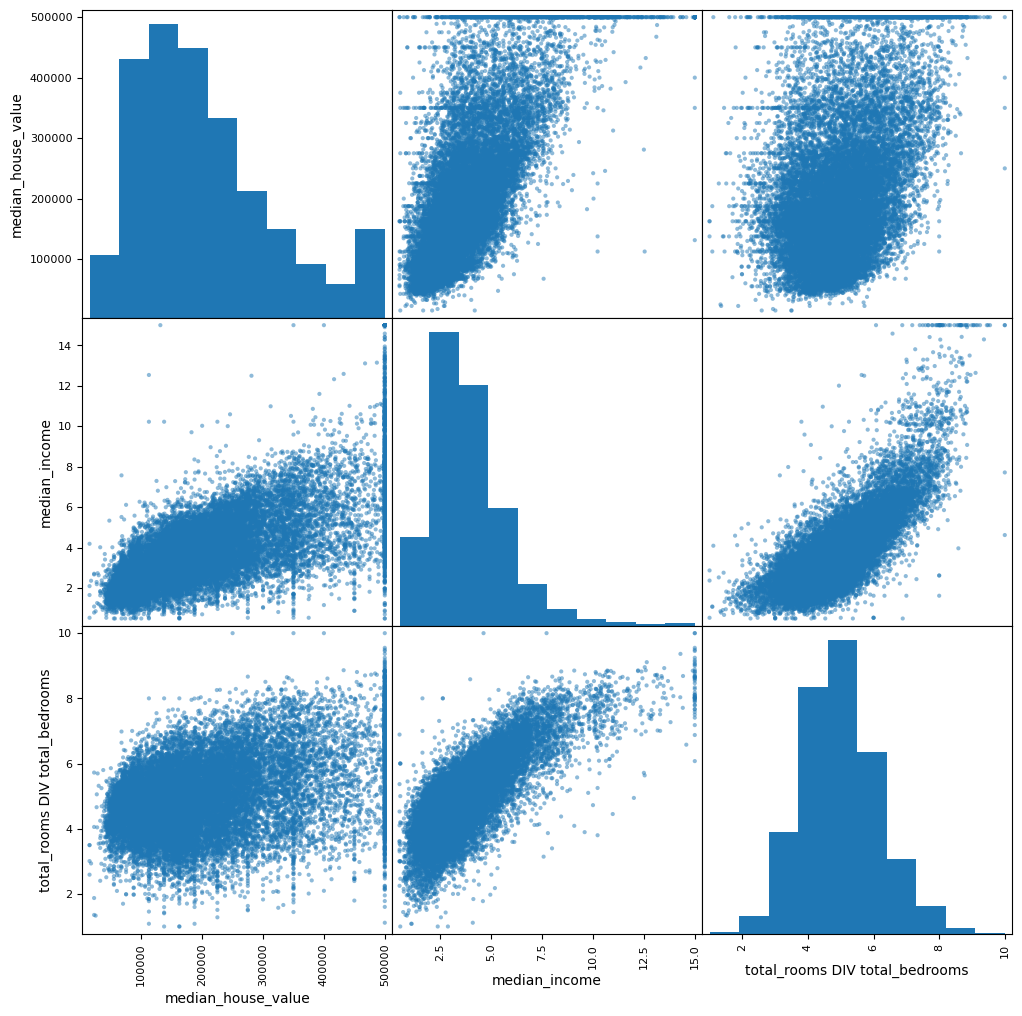

In [55]:
#calculando correlações
corr_housing_3 = housing_3.corr()["median_house_value"].sort_values(ascending=False)
print(corr_housing_3)
atributos = corr_housing_3[abs(corr_housing_3) > 0.3]
print(atributos.index)

pd.plotting.scatter_matrix(housing_3[atributos.index],figsize=(12,12))